# FBS without Torsional DOFs
This notebook shows an example of how excluding the torsional DOFs from the coupling nodes can lead to errors in the FBS coupled FRFs. This example uses the [beam model](generate_beam_example_system). As a reminder, the individual beam components and coupled beam system are shown below, where beam one is the blue beam and beam two is the red beam. 

![Beam1](./Images/beam1.svg)

![Beam2](./Images/beam2.svg)

Beams one and two are overlapped by 10 cm and are coupled to one another at three (evenly spaced) points at each end of the beam, as shown as the green dots in the image below. 

![CoupledBeams](./Images/CoupledBeams.svg)

## Importing Information for the Example
This section imports the necessary packages and data for the beam example systems. The truth FRFs are imported as a SDynPy `TransferFunctionArray` and are called `beam1_frfs`, `beam2_frfs`, and `coupled_system_frfs`. 

In [1]:
import sdynpy as sdpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beam1_frfs = sdpy.TransferFunctionArray.load(r'./example_frfs/beam1_frfs.npz')
beam2_frfs = sdpy.TransferFunctionArray.load(r'./example_frfs/beam2_frfs.npz')
coupled_system_frfs = sdpy.TransferFunctionArray.load(r'./example_frfs/coupled_beam_system_frfs.npz')

## FBS Coupling
This section performs the FBS coupling without the torsional coupling DOFs, which is done by only using direction "3" in the coupling coordinate definition (`beam1_coupling_coordinate` and `beam2_coupling_coordinate`). The errors in the FBS coupling are shown through comparisons between the first CMIF for the truth and FBS coupled FRFs (at the "evaluation coordinate"). This comparison shows that eliminating rotations causes minor errors resonant frequencies of the FBS coupled FRFs.

In [ ]:
beam1_coupling_coordinate = sdpy.coordinate_array(node=[1161, 1181, 1201], direction=3)
beam2_coupling_coordinate = sdpy.coordinate_array(node=[2001, 2021, 2041], direction=3) 

beam1_evaluation_coordinate = sdpy.coordinate_array(node=[1001, 1051, 1101, 1151], 
                                                    direction=3)
beam2_evaluation_coordinate = sdpy.coordinate_array(node=[2051, 2101, 2151, 2201], 
                                                    direction=3)

In [ ]:
coupling_coordinate_pairs = np.column_stack((beam1_coupling_coordinate, 
                                             beam2_coupling_coordinate))

bd_frfs = sdpy.TransferFunctionArray.block_diagonal_frf((beam1_frfs, beam2_frfs))
fbs_coupled_frfs = bd_frfs.substructure_by_coordinate(coupling_coordinate_pairs)

In [ ]:
comparison_coordinate = np.concatenate((beam1_evaluation_coordinate, 
                                        beam2_evaluation_coordinate))
comparison_coordinate = sdpy.coordinate.outer_product(comparison_coordinate, 
                                                      comparison_coordinate)

truth_coupled_cmif = coupled_system_frfs[comparison_coordinate].compute_cmif()
fbs_coupled_cmif = fbs_coupled_frfs[comparison_coordinate].compute_cmif()

Text(0, 0.5, 'CMIF Amplitude')

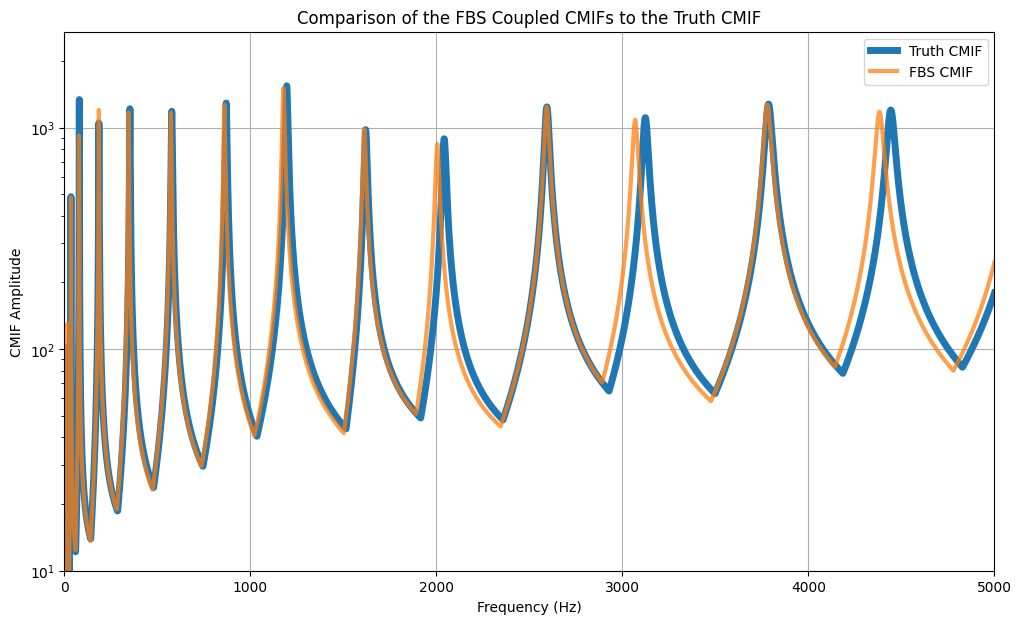

In [ ]:
plt.figure(figsize=(12,7))
plt.semilogy(truth_coupled_cmif[0].abscissa, truth_coupled_cmif[0].ordinate, linewidth=5, 
             label='Truth CMIF')
plt.semilogy(fbs_coupled_cmif[0].abscissa, fbs_coupled_cmif[0].ordinate, linewidth=3, 
             alpha=0.75, label='FBS CMIF')
plt.xlim(left=0, right=5000)
plt.ylim(bottom=1e1)
plt.grid()
plt.legend()
plt.title('Comparison of the FBS Coupled CMIFs to the Truth CMIF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('CMIF Amplitude');

## Conclusions
This notebook demonstrated how excluding the torsional DOFs in the coupling nodes can lead to errors in the FBS coupled FRFs. Although the errors weren't very significant in this example, it is important to recognize that an incomplete model of the interface can lead to significant uncertainties in the FBS coupled FRFs. 

```{note}
The errors from excluding the torsional DOFs may be more or less significant to the FBS coupling, depending on the significance of the rotations in the modes that are observed in the supplied FRFs. 
```